<a href="https://colab.research.google.com/github/Shiyaan/Capstone-2/blob/main/Telcom_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report
import os

# Load data

In [2]:
df = pd.read_csv('/content/telecom_customer_churn.csv')

# Data view

In [3]:
# No. of Columns and Rows
df.shape

(7043, 38)

In [4]:
# Dataframe structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              3166 non-null   objec

In [5]:
#Dataframe detail
df.describe(include='O').T

,count,unique,top,freq
Customer ID,7043,7043,9995-HOTOH,1
Gender,7043,2,Male,3555
Married,7043,2,No,3641
City,7043,1106,Los Angeles,293
Offer,3166,5,Offer B,824
Phone Service,7043,2,Yes,6361
Multiple Lines,6361,2,No,3390
Internet Service,7043,2,Yes,5517
Internet Type,5517,3,Fiber Optic,3035
Online Security,5517,2,No,3498


# Exploratory Data Analysis

### Missing Values

In [6]:
# Check for missing values
print(df.isnull().sum())

Customer ID                             0
Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Number of Referrals                     0
Tenure in Months                        0
Offer                                3877
Phone Service                           0
Avg Monthly Long Distance Charges     682
Multiple Lines                        682
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download              1526
Online Security                      1526
Online Backup                        1526
Device Protection Plan               1526
Premium Tech Support                 1526
Streaming TV                         1526
Streaming Movies                  

### Handling Missing Values

In [7]:
# Handling Missing Values in 'Offer'

## Fill missing values in 'Offer' with 'No Offer'
df['Offer'] = df['Offer'].fillna('No Offer')

## Verify that missing values are handled
print(df['Offer'].isnull().sum())


0


In [8]:
# Handling Missing Values in 'Churn Category' and 'Churn Reason'

## Fill missing values in 'Churn Category' and 'Churn Reason' with 'Not Churned'
df['Churn Category'] = df['Churn Category'].fillna('Not Churned')
df['Churn Reason'] = df['Churn Reason'].fillna('Not Churned')

## Verify that missing values are handled
print(df[['Churn Category', 'Churn Reason']].isnull().sum())

Churn Category    0
Churn Reason      0
dtype: int64


In [9]:
# Fill missing values in 'Avg Monthly Long Distance Charges' and 'Multiple Lines' for customers with no phone service
df.loc[df['Phone Service'] == 'No', 'Avg Monthly Long Distance Charges'] = 0
df.loc[df['Phone Service'] == 'No', 'Multiple Lines'] = 'No Phone Service'

# Verify that missing values are handled
print(df[['Avg Monthly Long Distance Charges', 'Multiple Lines']].isnull().sum())

Avg Monthly Long Distance Charges    0
Multiple Lines                       0
dtype: int64


In [10]:
# Fill missing values in internet service related columns for customers with no internet service
internet_cols_categorical = ['Internet Type', 'Online Security', 'Online Backup', 'Device Protection Plan',
                             'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music',
                             'Unlimited Data']
internet_col_numerical = 'Avg Monthly GB Download'

for col in internet_cols_categorical:
    df.loc[df['Internet Service'] == 'No', col] = 'No Internet Service'

df.loc[df['Internet Service'] == 'No', internet_col_numerical] = 0

# Verify that missing values are handled
print(df[internet_cols_categorical + [internet_col_numerical]].isnull().sum())

Internet Type              0
Online Security            0
Online Backup              0
Device Protection Plan     0
Premium Tech Support       0
Streaming TV               0
Streaming Movies           0
Streaming Music            0
Unlimited Data             0
Avg Monthly GB Download    0
dtype: int64


In [11]:
# @title
# Export the cleaned dataframe to a new CSV file
df.to_csv('telecom_customer_churn_cleaned.csv', index=False)

print("Cleaned data exported to 'telecom_customer_churn_cleaned.csv'")

Cleaned data exported to 'telecom_customer_churn_cleaned.csv'


### Summary Statistics

In [12]:
# Summary statistics for Variables
df.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
Age,7043.0,46.509726,16.750352,19.000000,32.000000,46.000000,60.000000,80.000000
Number of Dependents,7043.0,0.468692,0.962802,0.000000,0.000000,0.000000,0.000000,9.000000
Zip Code,7043.0,93486.070567,1856.767505,90001.000000,92101.000000,93518.000000,95329.000000,96150.000000
Latitude,7043.0,36.197455,2.468929,32.555828,33.990646,36.205465,38.161321,41.962127
Longitude,7043.0,-119.756684,2.154425,-124.301372,-121.788090,-119.595293,-117.969795,-114.192901
Number of Referrals,7043.0,1.951867,3.001199,0.000000,0.000000,0.000000,3.000000,11.000000
Tenure in Months,7043.0,32.386767,24.542061,1.000000,9.000000,29.000000,55.000000,72.000000
Avg Monthly Long Distance Charges,7043.0,22.958954,15.448113,0.000000,9.210000,22.890000,36.395000,49.990000
Avg Monthly GB Download,7043.0,20.515405,20.418940,0.000000,3.000000,17.000000,27.000000,85.000000
Monthly Charge,7043.0,63.596131,31.204743,-10.000000,30.400000,70.050000,89.750000,118.750000


### Data Distributions

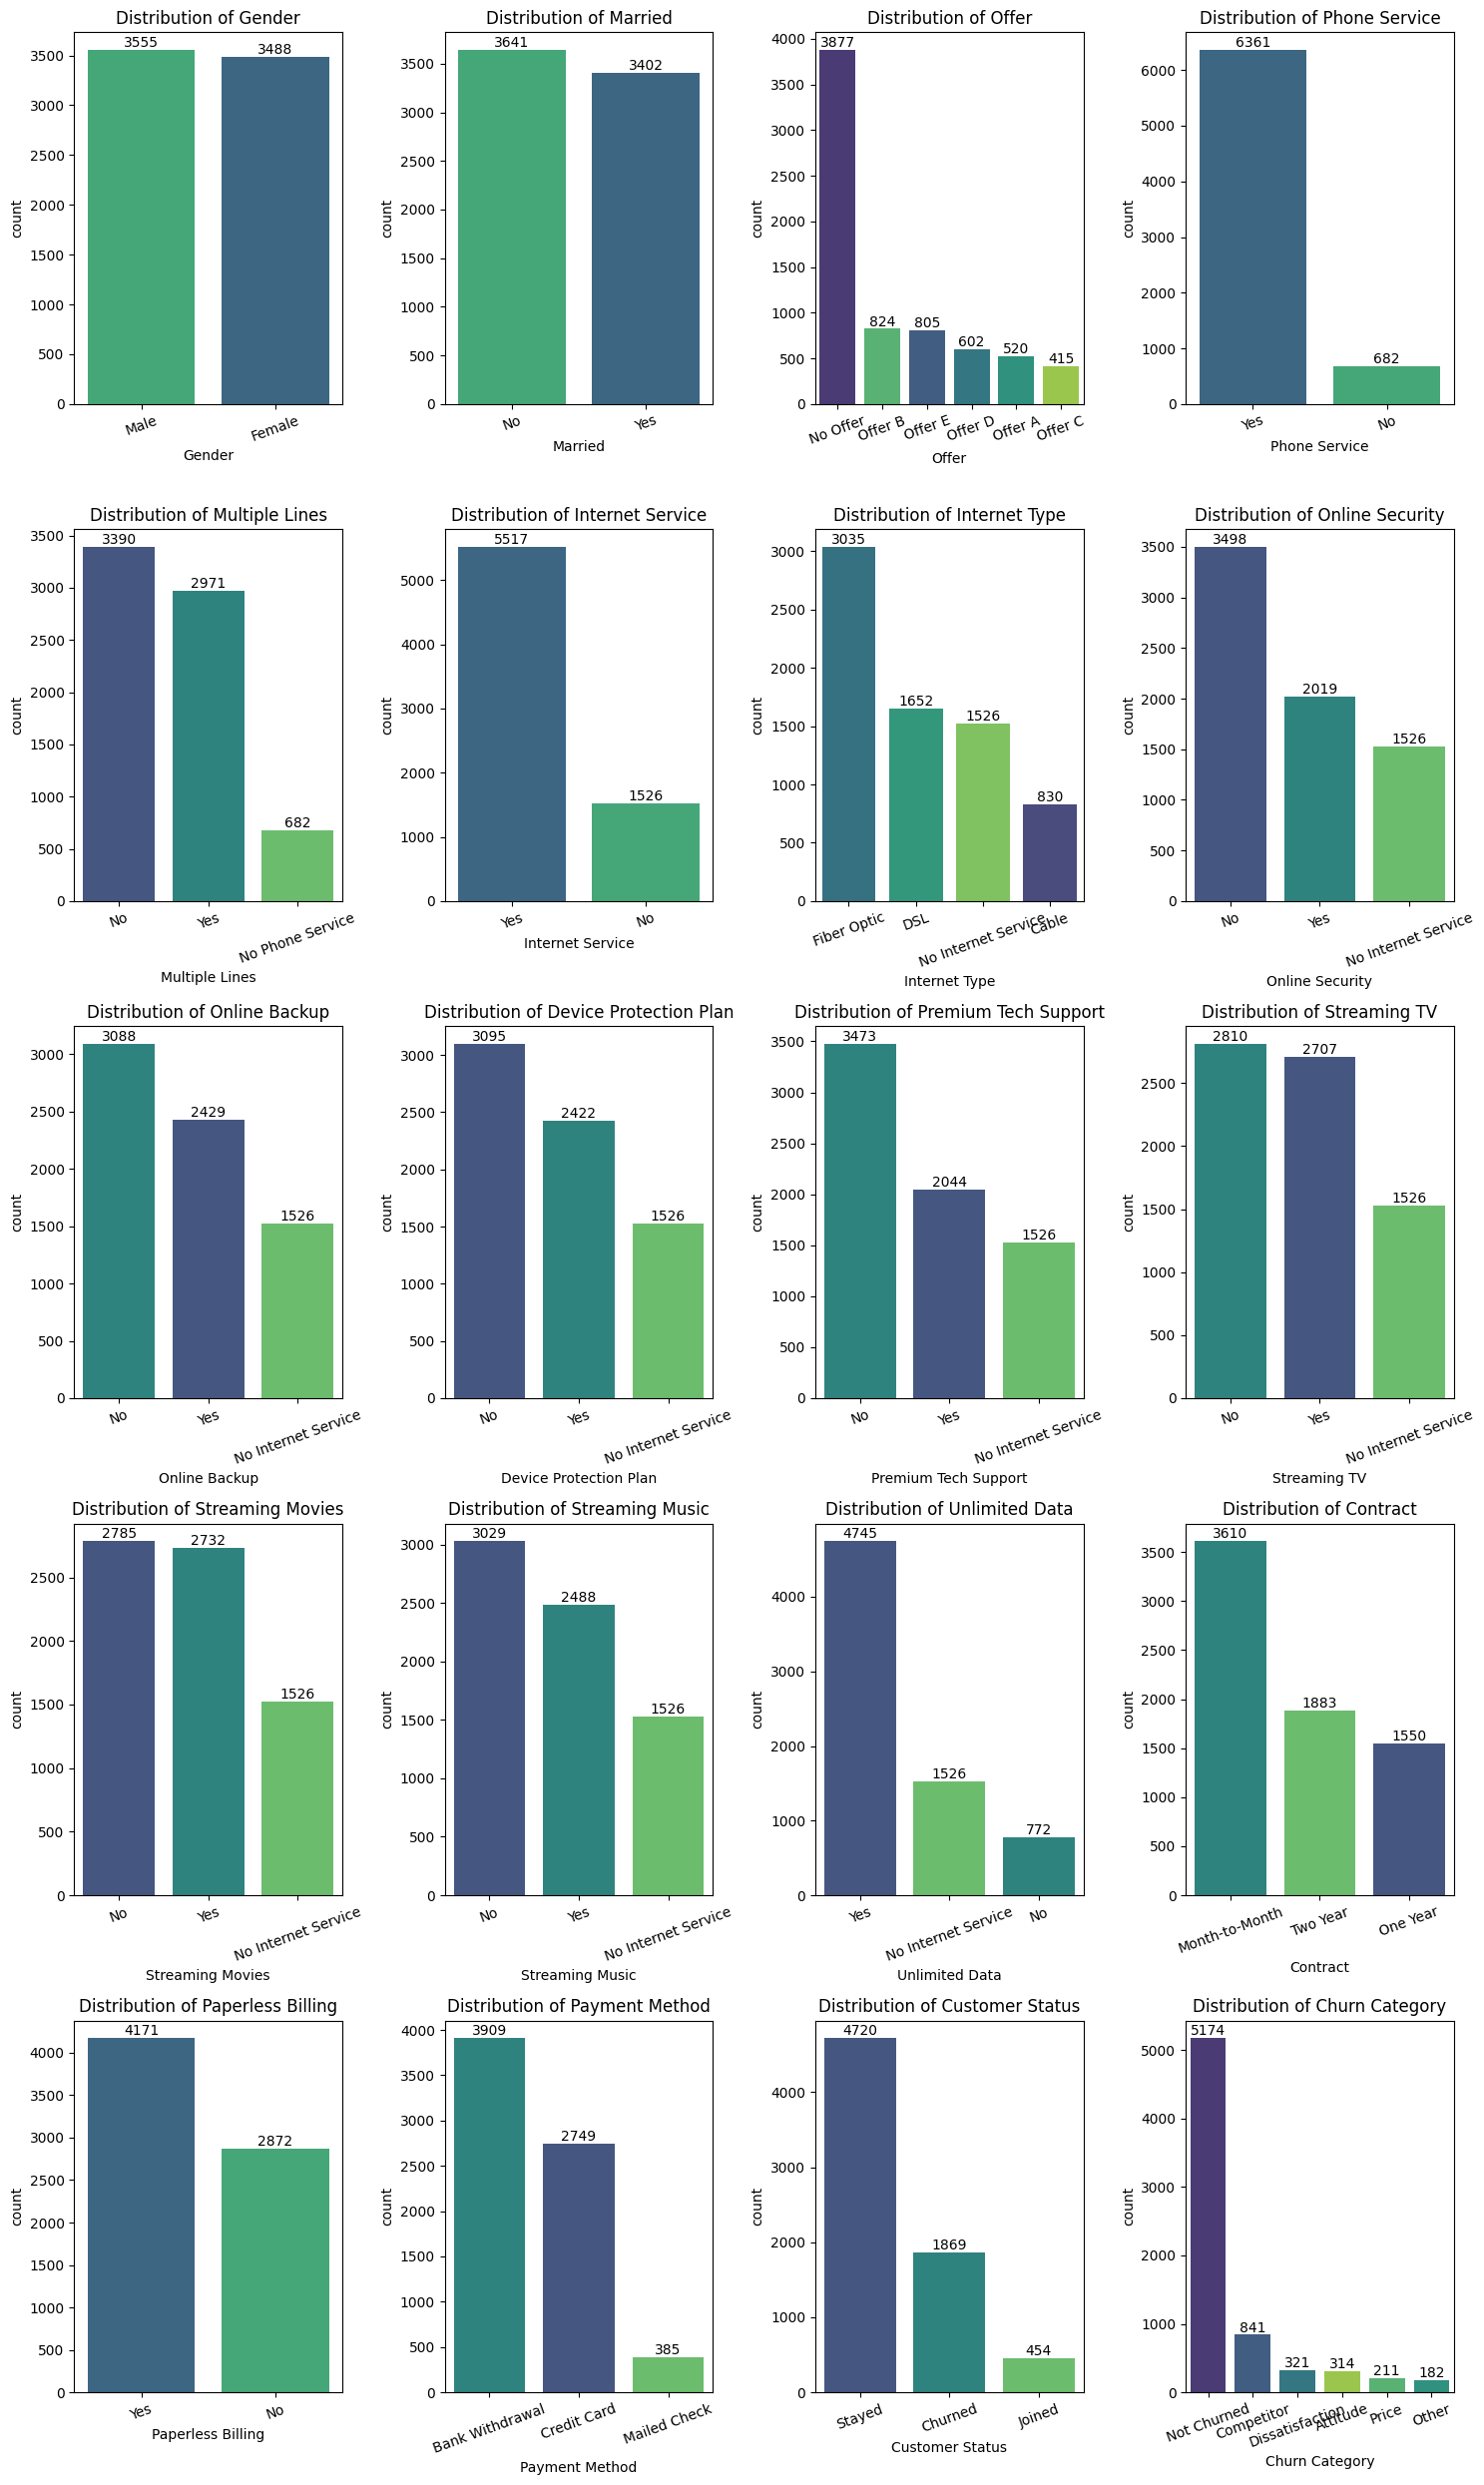

In [13]:
# Select categorical columns (excluding identifiers and already plotted/handled columns)
categorical_cols = df.select_dtypes(include='object').columns.tolist()

# Exclude columns where distribution visual are not insightful
exclude_cols = ['Customer ID', 'City', 'Churn Reason']
categorical_cols = [col for col in categorical_cols if col not in exclude_cols]

# Determine the number of rows and columns for subplots
n_cols = 4
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten()

# Plot count plots for categorical columns
for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, data=df, ax=axes[i], palette='viridis', order=df[col].value_counts().index, hue=col, legend=False)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].tick_params(axis='x', rotation=20) # Use tick_params for rotation

    # Add annotations
    for p in axes[i].patches:
        axes[i].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='center', fontsize=10, xytext=(0, 5),
                         textcoords='offset points')

# Hide any unused subplots
for j in range(len(categorical_cols), len(axes)):
    fig.delaxes(axes[j])


plt.tight_layout()
plt.show()

/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


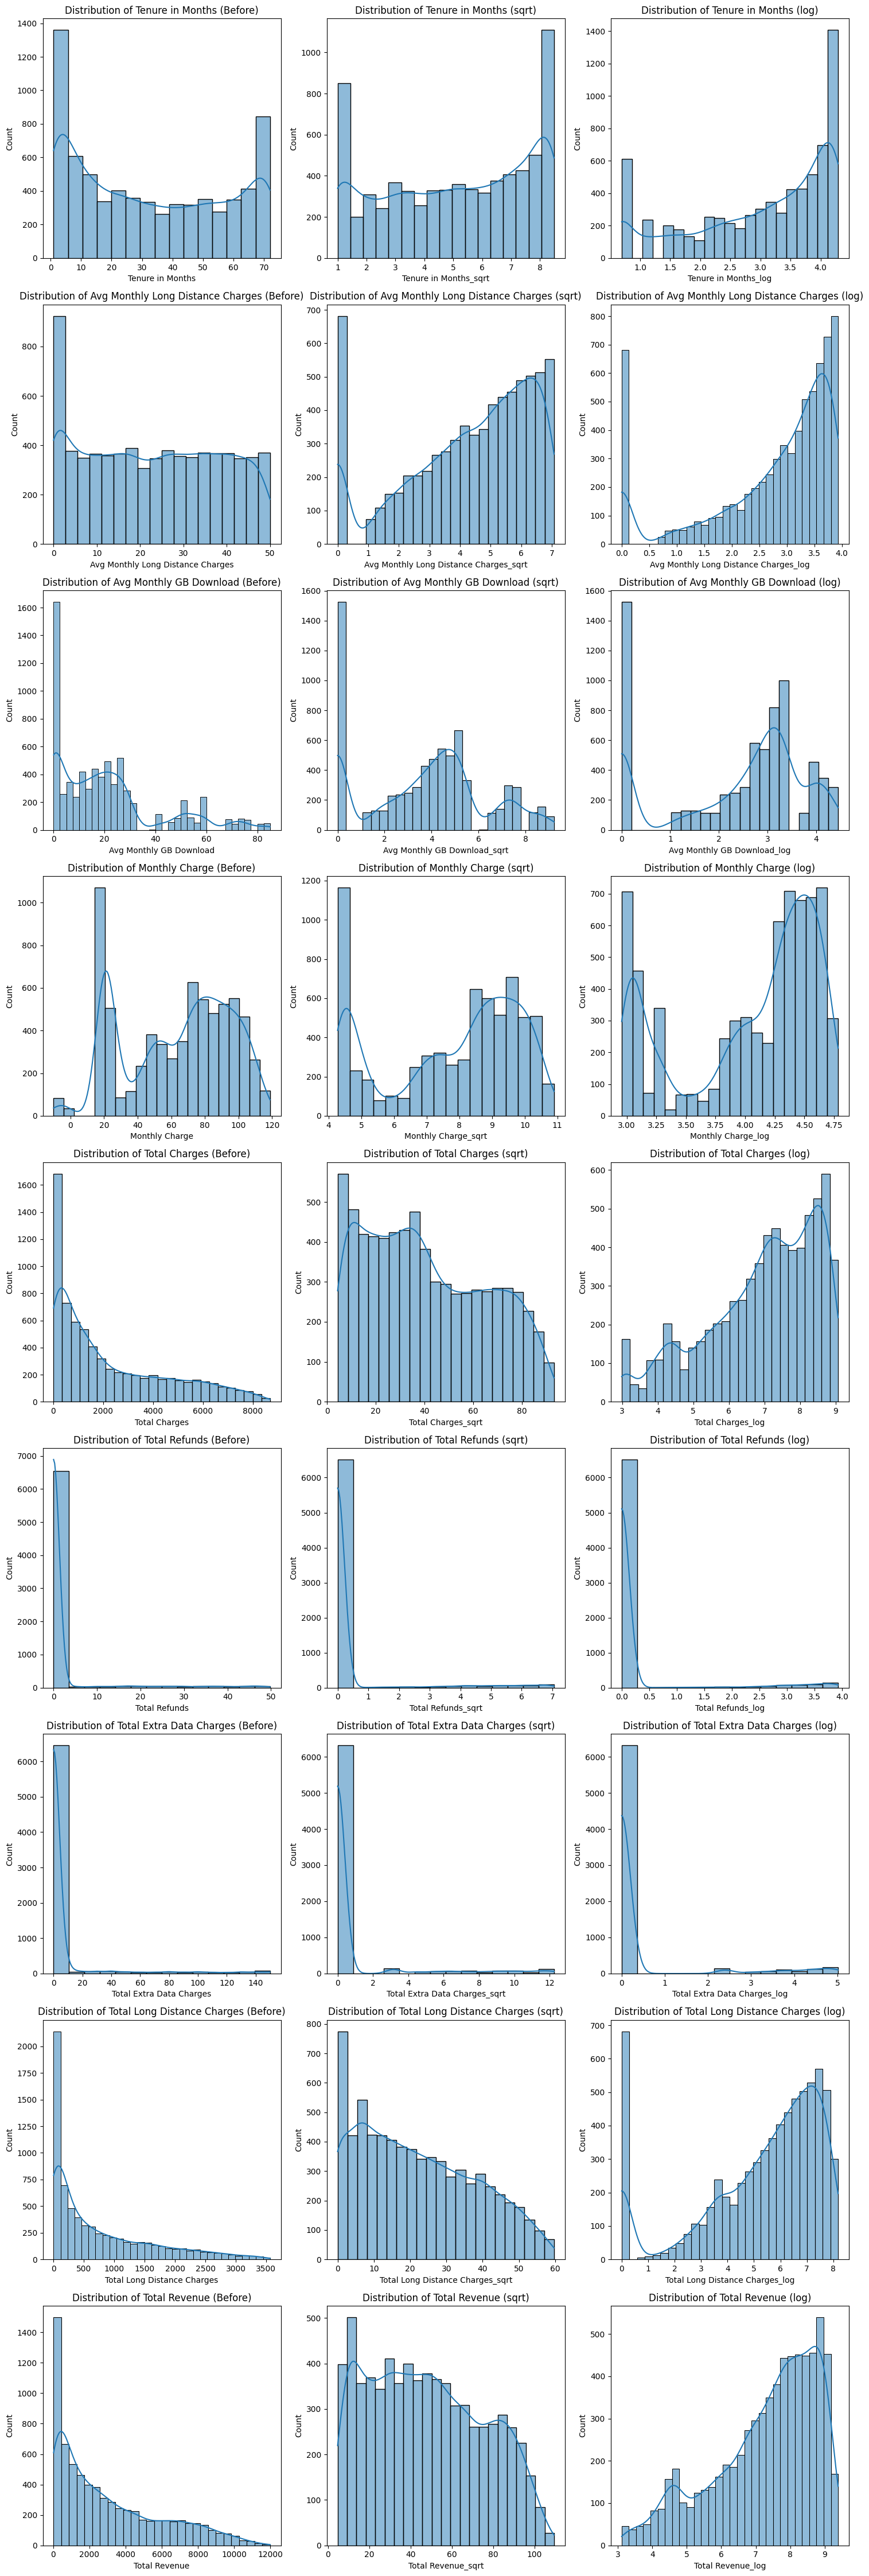

In [14]:
# Select numerical columns to potentially transform (excluding identifiers and those with negative values)
numerical_cols_for_transform = ['Tenure in Months', 'Avg Monthly Long Distance Charges',
                                'Avg Monthly GB Download', 'Monthly Charge', 'Total Charges',
                                'Total Refunds', 'Total Extra Data Charges', 'Total Long Distance Charges',
                                'Total Revenue']

# Apply transformations and create new columns (handle 0 values for log transform)
for col in numerical_cols_for_transform:
    # Square root transformation
    df[f'{col}_sqrt'] = np.sqrt(df[col])

    # Logarithmic transformation (add a small constant to handle zero values)
    df[f'{col}_log'] = np.log1p(df[col]) # Using log1p which is log(1+x)

# Determine the number of rows and columns needed for subplots
n_cols_subplot = 3  # One column for original, one for sqrt, one for log
n_rows_subplot = len(numerical_cols_for_transform)

fig, axes = plt.subplots(nrows=n_rows_subplot, ncols=n_cols_subplot, figsize=(15, n_rows_subplot * 5))


for i, column in enumerate(numerical_cols_for_transform):
    # Plot original distribution
    sns.histplot(df[column], kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Distribution of {column} (Before)')

    # Plot square root transformed distribution
    sns.histplot(df[f'{column}_sqrt'], kde=True, ax=axes[i, 1])
    axes[i, 1].set_title(f'Distribution of {column} (sqrt)')

    # Plot log transformed distribution
    sns.histplot(df[f'{column}_log'], kde=True, ax=axes[i, 2])
    axes[i, 2].set_title(f'Distribution of {column} (log)')


plt.tight_layout()
plt.show()

### Exploratory Data Analysis Report

**Objective:** The primary objective of this Exploratory Data Analysis (EDA) is to understand the structure, content, and characteristics of the telecom customer churn dataset. This includes identifying missing values, understanding data distributions, summarizing key statistics, and preparing the data for subsequent analysis and modeling.

**Tasks Completed:**

1.  **Data Loading and Initial Inspection:**
    *   **Reason:** To load the dataset into a pandas DataFrame and get a first look at its dimensions and data types.
    *   **Details:** The dataset was loaded from the provided CSV file (`telecom_customer_churn.csv`). The shape of the DataFrame was checked to determine the number of rows and columns. The `df.info()` method was used to inspect the data types of each column and identify initial non-null counts.

2.  **Missing Value Identification and Handling:**
    *   **Reason:** Missing values can impact the accuracy and performance of analysis and models. Identifying and appropriately handling them is crucial.
    *   **Details:** We checked for missing values in each column using `df.isnull().sum()`. Based on the nature of the columns and the likely reasons for missingness:
        *   Missing values in the 'Offer' column were filled with 'No Offer'.
        *   Missing values in 'Churn Category' and 'Churn Reason' were filled with 'Not Churned', assuming these represent customers who did not churn.
        *   For customers with 'No Phone Service', missing values in 'Avg Monthly Long Distance Charges' and 'Multiple Lines' were filled with 0 and 'No Phone Service' respectively.
        *   For customers with 'No Internet Service', missing values in internet-related categorical columns ('Internet Type', 'Online Security', 'Online Backup', etc.) were filled with 'No Internet Service' for categorical columns and 0 for 'Avg Monthly GB Download'.

3.  **Summary Statistics:**
    *   **Reason:** To quickly understand the central tendency, dispersion, and shape of the data for both numerical and categorical features.
    *   **Details:** `df.describe()` was used to generate descriptive statistics for numerical columns, providing insights into count, mean, standard deviation, minimum, maximum, and quartiles. `df.describe(include='object')` was used for categorical columns to show the count, unique values, top occurring value, and its frequency.

4.  **Distribution Analysis:**
    *   **Reason:** To visualize the distribution of individual variables and identify patterns, outliers, or imbalances in the data.
    *   **Details:**
        *   The distribution of the target variable, 'Customer Status', was visualized using a bar plot to see the proportion of customers who have Stayed, Churned, or Joined.
        *   Histograms were generated for key numerical features like 'Tenure in Months' and 'Monthly Charge' to show their frequency distributions.
        *   Count plots were created for other categorical features to visualize the frequency of each category. **We have now comprehensively visualized the distributions of all relevant categorical columns using count plots.**

5.  **Numerical Variable Transformation (Attempt):**
    *   **Reason:** To explore if transformations like square root and logarithm can make the distributions of numerical features more symmetrical or normal, which can be beneficial for certain modeling techniques.
    *   **Details:** Square root and logarithmic (using `log1p` to handle zeros) transformations were applied to several numerical columns. Histograms were generated to visualize the distributions before and after transformation. (Note: Further investigation into negative values in some columns is required for accurate transformations).